# Parte 1: Machine Learning [texto del vínculo](https://)

## Fuente de Datos

[Predicting Student Scores (Sklearn)](https://www.kaggle.com/code/jaisinghbhandari/predicting-student-scores-sklearn/notebook)


[MetaData (Sklearn)](https://www.kaggle.com/datasets/kwadwoofosu/predict-test-scores-of-students?resource=download)

## 1. Librerias y Data Set

In [17]:
#Data Structure libraries
import numpy as np
import pandas as pd

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("test_scores.xls")

dataset.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


**Características de entrada:**
1. school: Identificador de la escuela a la que asiste el estudiante.
2.   school_setting: Entorno de la escuela (urbano, suburbano, rural).
3.   school_type: Tipo de escuela (charter, público).
4.  classroom: Identificador del aula.
5. teaching_method: Método de enseñanza utilizado (experimental, estándar).
6. n_student: Número de estudiantes en el aula.
7. student_id: Identificador único del estudiante.
8. gender: Género del estudiante (masculino, femenino).
9. lunch: Tipo de almuerzo que recibe el estudiante (gratuito/reducido, estándar).
10. pretest: Puntaje obtenido por el estudiante en una prueba previa a la intervención educativa.

**Salida**

**posttest**: Puntaje obtenido por el estudiante en una prueba posterior a la intervención educativa.



**Codificación de las características:**

*   **Variables categóricas:** Características como `school`, `school_setting`, `school_type`, `classroom`, `teaching_method`, `gender` y `lunch` son categóricas y generalmente se codifican utilizando técnicas como One-Hot Encoding para ser utilizadas en modelos de machine learning.
*   Variables numéricas: Características como `n_student`, `student_id`, `pretest` y `posttest` son numéricas y pueden utilizarse directamente en los modelos o ser normalizadas según sea necesario.

In [3]:
dataset.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


# 3. Procesamiento del Data Set

In [18]:
#Separating the parameters and the result column names
columns = dataset.columns.values.tolist()
columns.remove('posttest')
columns

#Separating the parameters and the result values
X = dataset[columns]
y = dataset['posttest']

#Encoding the categorical data in the dataset
x = pd.get_dummies(X)
x.head()

,n_student,pretest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,...,student_id_ZUFG3,student_id_ZVCQ8,student_id_ZVM0Q,student_id_ZX8TB,student_id_ZY9X3,student_id_ZZGRB,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,20.0,66.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,20.0,64.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,20.0,61.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,20.0,64.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


# 4. División de Datos para Entrenamiento y Testeo

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# 5. Entrenamiento utilizando Regresión lineal de multiples variables


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Making predictions using our model
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred)

## 6. Evaluando los Resultados

We compare the actual and predicted values using various plots and metrics to evaluate the predictions

In [7]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()
result.insert(2, "Percent Difference",(abs((result['Predicted']-result['Actual'])*100/result['Actual'])).round(), True)
result.head()

,Actual,Predicted,Percent Difference
1473,94.0,96.0,2.0
1094,41.0,44.0,7.0
1234,57.0,61.0,7.0
699,51.0,55.0,8.0
469,81.0,81.0,0.0


# Parte 2: Test Estadístico

Vamos a realizar dos pruebas estadísticas usando el paired t-test:

Comparar la media de las calificaciones del pretest con la media del posttest (valores reales).
Comparar la media del pretest con la media de los valores predecidos del posttest (y_pred).
Codigo Base: En este apartado, se realizará un análisis estadístico para comparar las medias del pretest y posttest del conjunto real de datos utilizando el método Paired t-test.

In [36]:
from scipy.stats import ttest_rel
import numpy as np

# Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
posttest_mean = y_test.mean()

# Paired t-test entre pretest y posttest # verificar las opciones de ttest_rel (e.g., una cola, dos colas, etc)
t_statistic, p_value = ttest_rel(X_test['pretest'],y_test)

print("=== Paired t-test: Pretest vs Posttest ===")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {posttest_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

=== Paired t-test: Pretest vs Posttest ===
Pretest Mean: 55.232209737827716
Posttest Mean: 67.1067415730337
T-statistic: -63.68070462621622
P-value: 2.566773889933603e-251



# Actividad 1:

Mejora el `código base` anterior que comparar la media de las calificaciones del pretest con la media del posttest (valores reales). Para esto deberás incluir lo siguiente:

### 1. Definición de hipótesis:

Incluye comentarios que definan explícitamente las hipótesis: H0 y H1.

### 2. Agregar una comparación del p-value con un nivel de significancia (alpha):

Introduce una variable alpha = 0.05 como nivel de significancia. Recuerda que:
Si `p_value < alpha:` Se rechaza la hipótesis nula.
Si `p_value >= alpha:` No se rechaza la hipótesis nula.

### 3. Presentar los resultados:

Imprimir los siguientes resultados:

1. Las medias del pretest y posttest.
2. El valor del estadístico t.
3. El p-value.
4. La decisión final: si se rechaza o no la hipótesis nula.

=== Paired t-test: Pretest vs Posttest ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.

Pretest Mean: 55.2322
Posttest Mean: 67.1067
T-statistic: -63.6807
P-value: 1.0

❌ Resultado del test:
--------------------------------------------------
p-value = 1.0000 es mayor o igual que el nivel de significancia alpha = 0.05.
Por lo tanto, no se rechaza la hipótesis nula (H0).
Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.
Las diferencias observadas podrían deberse al azar o a factores no controlados.
--------------------------------------------------



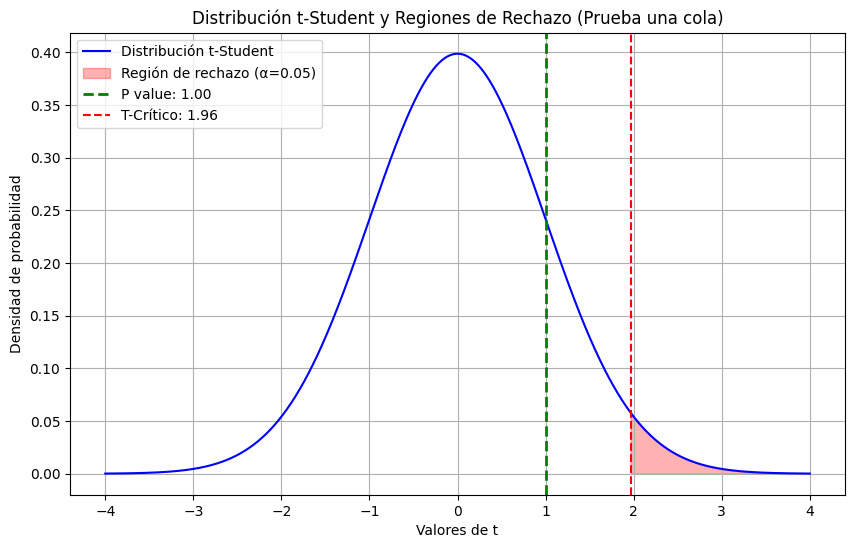

In [68]:
from scipy.stats import ttest_rel
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Definir las hipótesis aquí:
# H0 (Hipótesis nula): La media del posttest NO es mayor que la media del pretest (mu_posttest <= mu_pretest).
    # ("Esto indica que hay una diferencia estadísticamente significativa entre las calificaciones del pretest y posttest.")
# H1 (Hipótesis alternativa): La media del posttest es mayor que la media del pretest (mu_posttest > mu_pretest).
    # ("Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.")

# 2. Incluir el valor del Nivel de significancia correspondiente
alpha = 0.05  # ingresar el valor aqui

# 3. Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
posttest_mean = y_test.mean()  # y_test contiene los valores reales de posttest

# 4. Paired t-test entre pretest y posttest
t_statistic, p_value = ttest_rel(X_test['pretest'], y_test, alternative="greater")   # prueba de dos colas


# 5. Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.\n")
print(f"Pretest Mean: {pretest_mean:.4f}")
print(f"Posttest Mean: {posttest_mean:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")

# 6. Decisión basada en el p-value y alpha
if p_value < alpha:
    print("\n✅ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es menor que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, se rechaza la hipótesis nula (H0).")
    print("Esto indica que hay una diferencia estadísticamente significativa entre las calificaciones del pretest y posttest.")
    print("En otras palabras, la intervención educativa aplicada tuvo un efecto significativo en las calificaciones de los estudiantes.")
    print("--------------------------------------------------\n")
else:
    print("\n❌ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es mayor o igual que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, no se rechaza la hipótesis nula (H0).")
    print("Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.")
    print("Las diferencias observadas podrían deberse al azar o a factores no controlados.")
    print("--------------------------------------------------\n")
# 7. Cálculo correcto de grados de libertad
df = len(X_test['pretest']) - 1  # grados de libertad

# =======================
# 8. Visualización de la Distribución t
# =======================

# Distribución t de Student
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Valor crítico (dos colas)
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución t-Student", color="blue")

# Sombrear regiones de rechazo
plt.fill_between(x, y, where= (x >= t_critical), color="red", alpha=0.3, label="Región de rechazo (α=0.05)")

# Línea del valor t calculado
plt.axvline(p_value, color="green", linestyle="dashed", linewidth=2, label=f"P value: {p_value:.2f}")

# Líneas de referencia (valor crítico)
#plt.axvline(-t_critical, color="red", linestyle="dashed", label=f"T-Crítico: {-t_critical:.2f}")
plt.axvline(t_critical, color="red", linestyle="dashed", label=f"T-Crítico: {t_critical:.2f}")

# Etiquetas y título
plt.xlabel("Valores de t")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución t-Student y Regiones de Rechazo (Prueba una cola)")
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()


In [66]:
from scipy.stats import ttest_rel
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_rel

# 1. Definir las hipótesis aquí:
# H0 (Hipótesis nula): La media del posttest NO es mayor que la media del pretest (mu_posttest <= mu_pretest).
# H1 (Hipótesis alternativa): La media del posttest es mayor que la media del pretest (mu_posttest > mu_pretest).


# 2. Incluir el valor del Nivel de significancia correspondiente
alpha=  0.05 #ingresar el valor aqui

# 3. Cálculo de la media del pretest  posttest (valores real)
pretest_mean = X_test['pretest'].mean()
# Cálculo de la media del posttest (valor real)
posttest_mean = y_test.mean()  # y_test contiene los valores reales de posttest

# 4. Paired t-test entre pretest y posttest
t_statistic, p_value = ttest_rel(X_test['pretest'],y_test, alternative="greater")   # consultar para hacer doble cola o single cola

# 5. Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.\n")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {posttest_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


# 6. Decisión basada en el p-value y alpha
if p_value < alpha:
    print("\n✅ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es menor que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, se rechaza la hipótesis nula (H0).")
    print("Esto indica que hay una diferencia estadísticamente significativa entre las calificaciones del pretest y posttest.")
    print("En otras palabras, la intervención educativa aplicada tuvo un efecto significativo en las calificaciones de los estudiantes.")
    print("--------------------------------------------------\n")
else:
    print("\n❌ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es mayor o igual que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, no se rechaza la hipótesis nula (H0).")
    print("Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.")
    print("Las diferencias observadas podrían deberse al azar o a factores no controlados.")
    print("--------------------------------------------------\n")

=== Paired t-test: Pretest vs Posttest ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.

Pretest Mean: 55.232209737827716
Posttest Mean: 67.1067415730337
T-statistic: -63.68070462621622
P-value: 1.0

❌ Resultado del test:
--------------------------------------------------
p-value = 1.0000 es mayor o igual que el nivel de significancia alpha = 0.05.
Por lo tanto, no se rechaza la hipótesis nula (H0).
Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.
Las diferencias observadas podrían deberse al azar o a factores no controlados.
--------------------------------------------------



# Actividad 2: Utilice exactamente el mismo código de la 
## Actividad 

1) Para comparar la media del `pretest` con la media de los valores predecidos del posttest (`y_pred`).

=== Paired t-test: Pretest vs Posttest ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.

Pretest Mean: 55.2322
Posttest Mean: 67.1348
T-statistic: -63.6807
P-value: 1.0

❌ Resultado del test:
--------------------------------------------------
p-value = 1.0000 es mayor o igual que el nivel de significancia alpha = 0.05.
Por lo tanto, no se rechaza la hipótesis nula (H0).
Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.
Las diferencias observadas podrían deberse al azar o a factores no controlados.
--------------------------------------------------



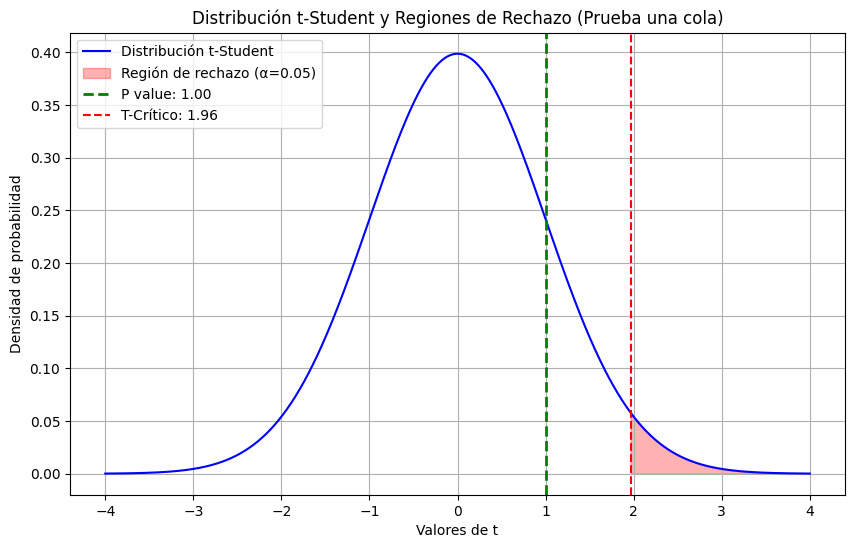

In [67]:
from scipy.stats import ttest_rel
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Definir las hipótesis aquí:
# H0 (Hipótesis nula): La media del posttest NO es mayor que la media del pretest (mu_posttest <= mu_pretest).
    # ("Esto indica que hay una diferencia estadísticamente significativa entre las calificaciones del pretest y posttest.")
# H1 (Hipótesis alternativa): La media del posttest es mayor que la media del pretest (mu_posttest > mu_pretest).
    # ("Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.")

# 2. Incluir el valor del Nivel de significancia correspondiente
alpha = 0.05  # ingresar el valor aqui

# 3. Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
posttest_mean = y_pred.mean()  # y_test contiene los valores reales de posttest

# 4. Paired t-test entre pretest y posttest
t_statistic, p_value = ttest_rel(X_test['pretest'], y_test, alternative="greater")   # prueba de dos colas


# 5. Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.\n")
print(f"Pretest Mean: {pretest_mean:.4f}")
print(f"Posttest Mean: {posttest_mean:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")

# 6. Decisión basada en el p-value y alpha
if p_value < alpha:
    print("\n✅ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es menor que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, se rechaza la hipótesis nula (H0).")
    print("Esto indica que hay una diferencia estadísticamente significativa entre las calificaciones del pretest y posttest.")
    print("En otras palabras, la intervención educativa aplicada tuvo un efecto significativo en las calificaciones de los estudiantes.")
    print("--------------------------------------------------\n")
else:
    print("\n❌ Resultado del test:")
    print("--------------------------------------------------")
    print(f"p-value = {p_value:.4f} es mayor o igual que el nivel de significancia alpha = {alpha}.")
    print("Por lo tanto, no se rechaza la hipótesis nula (H0).")
    print("Esto sugiere que NO hay evidencia suficiente para afirmar que la intervención educativa haya producido un cambio significativo en las calificaciones.")
    print("Las diferencias observadas podrían deberse al azar o a factores no controlados.")
    print("--------------------------------------------------\n")
# 7. Cálculo correcto de grados de libertad
df = len(X_test['pretest']) - 1  # grados de libertad

# =======================
# 8. Visualización de la Distribución t
# =======================

# Distribución t de Student
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Valor crítico (dos colas)
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución t-Student", color="blue")

# Sombrear regiones de rechazo
plt.fill_between(x, y, where= (x >= t_critical), color="red", alpha=0.3, label="Región de rechazo (α=0.05)")

# Línea del valor t calculado
plt.axvline(p_value, color="green", linestyle="dashed", linewidth=2, label=f"P value: {p_value:.2f}")

# Líneas de referencia (valor crítico)
#plt.axvline(-t_critical, color="red", linestyle="dashed", label=f"T-Crítico: {-t_critical:.2f}")
plt.axvline(t_critical, color="red", linestyle="dashed", label=f"T-Crítico: {t_critical:.2f}")

# Etiquetas y título
plt.xlabel("Valores de t")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución t-Student y Regiones de Rechazo (Prueba una cola)")
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()


In [57]:
from scipy.stats import ttest_rel
import numpy as np

# Definir las hipótesis aqui:
# Hipótesis Nula (H0):
# Hipótesis Alternativa (H1):

# Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
# Cálculo de la media del posttest (valor real)
predicted_posttest_mean = y_pred.mean()         #inserte su linea de codigo aqui

# Paired t-test entre pretest y posttest
t_statistic, p_value = ttest_rel(X_test['pretest'],y_test)

# Incluir el valor del Nivel de significancia correspondiente
alpha= 0.05 #ingresar el valor aqui

# Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.\n")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {predicted_posttest_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")



# Decisión
# ingresar el código aquí es un if - else, Hint: ver el codigo visto en clases HypothesisTesting para saber la programación
# insertar el codigo aqui

=== Paired t-test: Pretest vs Posttest ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Hay una diferencia significativa entre las medias del pretest y posttest.

Pretest Mean: 55.232209737827716
Posttest Mean: 67.13483146067416
T-statistic: -63.68070462621622
P-value: 2.566773889933603e-251


# Parte 3: Kolmogorov-Smirnov KS Test: Goodness-of-fit

Actividad 3: Anarlizar un conjunto de datos desconocidos (generados a partir de una distribución específica) y utilizar el Test de Kolmogorov-Smirnov (KS) para determinar la distribución de probabilidad que más se ajuste a los datos

Cargamos la libreria para el test no estadístico KS

In [ ]:
!pip install fitter

Código a Completar (Investigar las distintas distribuciones y descubra como se modelan los datos )

2025-03-13 22:55:57.188 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.518696)
2025-03-13 22:55:57.191 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=26.063078)
2025-03-13 22:55:57.215 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.510956)
2025-03-13 22:55:57.232 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.540471)
2025-03-13 22:55:57.232 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.490128)
2025-03-13 22:55:57.233 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted nakagami distribution with error=0.478975)
2025-03-13 22:55:57.287 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted triang distribution with error=6.493707)
2025-03-13 22:55:57.900 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fit

=== Parámetros de las distribuciones ajustadas ===
norm: (np.float64(0.9478521830261226), np.float64(0.30719151186851557))
uniform: (0.0921909623342274, 2.30957494113226)
beta: (np.float64(8.364287296082225), np.float64(26.60191609815116), np.float64(-0.0855977969876621), np.float64(4.320211344777597))
gamma: (np.float64(20.290762246935117), np.float64(-0.4387095340700826), np.float64(0.06833462698646439))
lognorm: (np.float64(0.14631129975568957), -1.1444313169243894, np.float64(2.070026311490376))
expon: (0.0921909623342274, 0.8556612206918952)
nakagami: (np.float64(2.3342518031773114), np.float64(0.0319040113535191), np.float64(0.9660910368212519))
weibull_min: (np.float64(2.7095892810225033), np.float64(0.17166743960103065), np.float64(0.872629766790594))
triang: (np.float64(0.28978470199877393), np.float64(0.09137835633153246), np.float64(2.311056118154875))

=== Resultados del test de Kolmogorov-Smirnov (KS) ===
norm: KS-statistic = [0.02855575], p-value = [0.00056351]
uniform: K

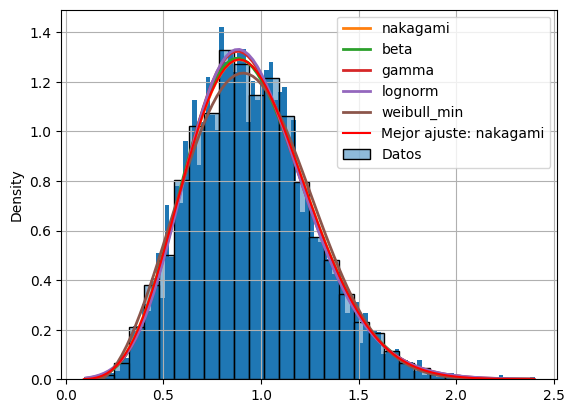

In [63]:
import numpy as np
from fitter import Fitter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from scipy.stats import kstest, norm, expon, uniform, gamma, beta, lognorm, nakagami
from scipy.stats import norm, uniform, beta, gamma, lognorm, expon, nakagami, weibull_min, triang

#from google.colab import files

# Subir el archivo de muestras desconocidas
#uploaded = files.upload()

# Cargar las muestras subidas
#uploaded_file = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data_uploaded = pd.read_csv("samples.csv").values

# Lista de distribuciones AQUI SE TIENE QUE INVESTIGAR OTROS TIPOS DE DISTRIBUCIONES continuas PARA VER EL MEJOR AJUSTE, ACTUALMENTE ESTAN SOLO DOS, por lo menos colocar 4 distribuciones mas
distributions = ["norm", "uniform", "beta", "gamma", "lognorm", "expon", "nakagami", "weibull_min", "triang"]


# Crear un diccionario dinámico para mapear nombres a funciones de scipy.stats

scipy_distributions = {
    "norm": norm,
    "uniform": uniform,
    "beta": beta,
    "gamma": gamma,
    "lognorm": lognorm,
    "expon": expon,
    "nakagami": nakagami,
    "weibull_min": weibull_min,
    "triang": triang
}

# Inicializar el Fitter con las distribuciones
f = Fitter(data_uploaded, distributions=distributions)

# Ajustar los datos a las distribuciones
f.fit()

# Mostrar todas las distribuciones ajustadas con sus parámetros
print("=== Parámetros de las distribuciones ajustadas ===")
for dist_name, params in f.fitted_param.items():
    print(f"{dist_name}: {params}")

# Realizar el test KS para cada distribución ajustada
ks_results = {}
for dist_name, params in f.fitted_param.items():
    dist = scipy_distributions[dist_name]  # Obtener la distribución de scipy.stats
    cdf = lambda x: dist.cdf(x, *params)  # CDF de la distribución ajustada
    ks_statistic, p_value = kstest(data_uploaded, cdf)
    ks_results[dist_name] = (ks_statistic, p_value)

# Mostrar resultados del test KS
print("\n=== Resultados del test de Kolmogorov-Smirnov (KS) ===")
for dist_name, (ks_statistic, p_value) in ks_results.items():
    print(f"{dist_name}: KS-statistic = {ks_statistic}, p-value = {p_value}")

# Seleccionar la mejor distribución basada en el menor KS-statistic
best_fit = min(ks_results, key=lambda k: ks_results[k][0])

# Resultados del mejor ajuste
print("\n=== Mejor distribución ajustada según KS ===")
print(f"{best_fit}: KS-statistic = {ks_results[best_fit][0]}, p-value = {ks_results[best_fit][1]}")

# Resumen del ajuste con visualización
f.summary()

# Visualización del histograma de los datos
sns.histplot(data_uploaded, kde=False, stat="density", bins=30, label="Datos", color="blue")

# Graficar la mejor distribución ajustada (PDF)
best_params = f.fitted_param[best_fit]
best_dist = scipy_distributions[best_fit]

x = np.linspace(min(data_uploaded), max(data_uploaded), 100)
plt.plot(
    x,
    best_dist.pdf(x, *best_params),
    label=f"Mejor ajuste: {best_fit}",
    color="red"
)
plt.legend()
plt.show()


### Conclusion : 
La distribución Nakagami es la que mejor se ajusta a los datos analizados, ofreciendo una representación precisa del comportamiento de las muestras. Por tanto, si se requiere modelar o generar datos similares a los observados, Nakagami sería la opción recomendada con base en esta visualización.

La distribucion Nakagami generalmente pertence a : 

- Datos de señales de telecomunicaciones , donde su es modelar la propagación de señales inalámbricas en presencia de dispersión, multitrayectoria, y efectos de interferencia.

- Fenómenos físicos con variación estocástica : Variables que describen potencia recibida o intensidad de señal.
Modelado de reflejos y dispersiones en ambientes físicos.

### Graficacion de los diferentes tipos de distribucion en subplots Separados para mejor apreciacion


=== Mejor distribución ajustada según KS ===
nakagami: KS-statistic = 0.0096, p-value = 0.7420


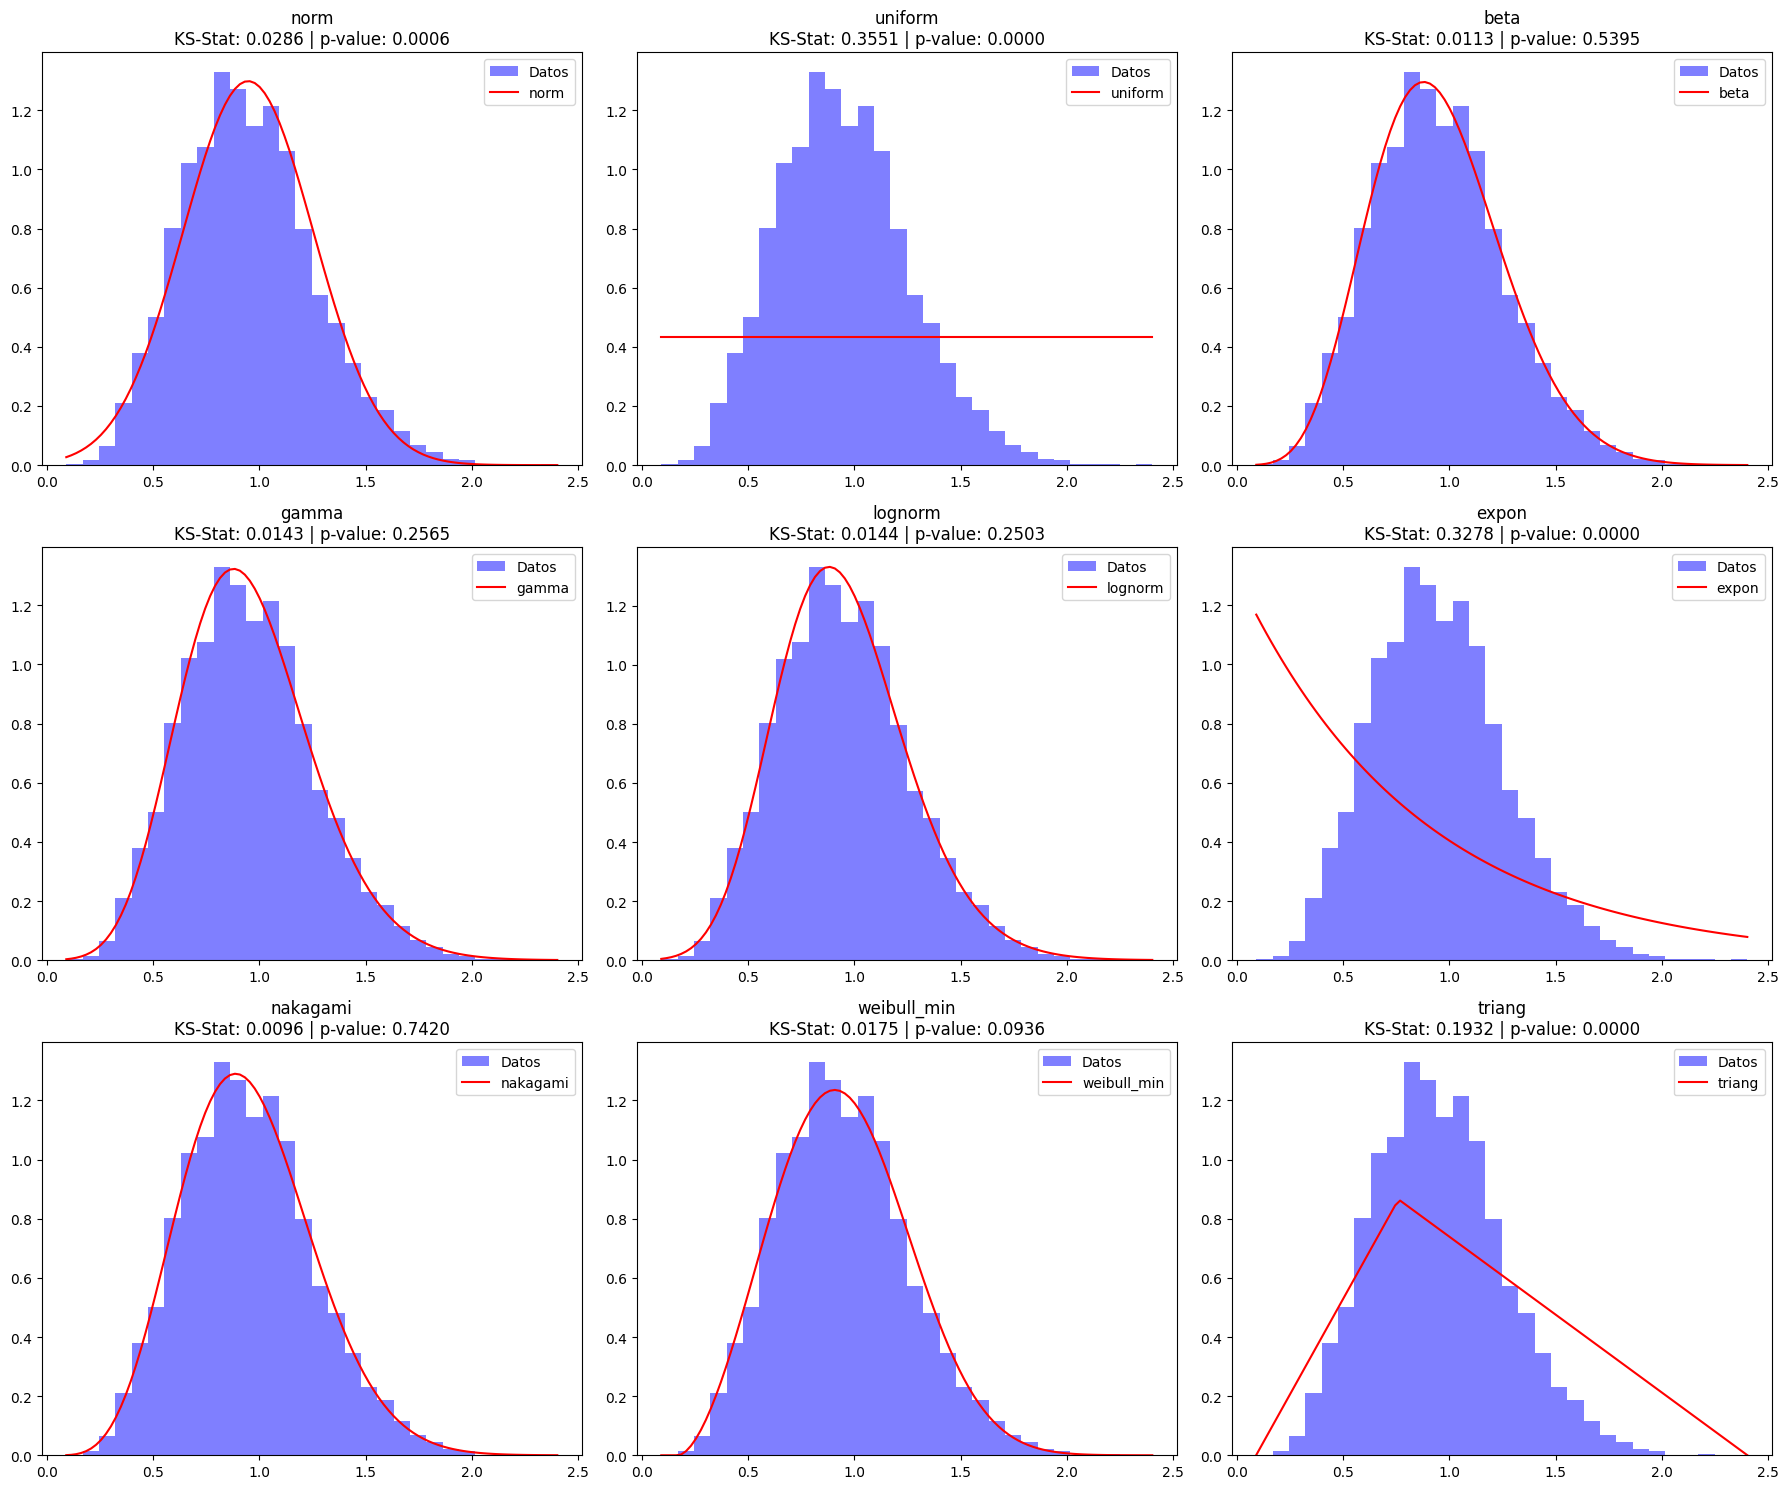


=== Resumen gráfico del mejor ajuste ===


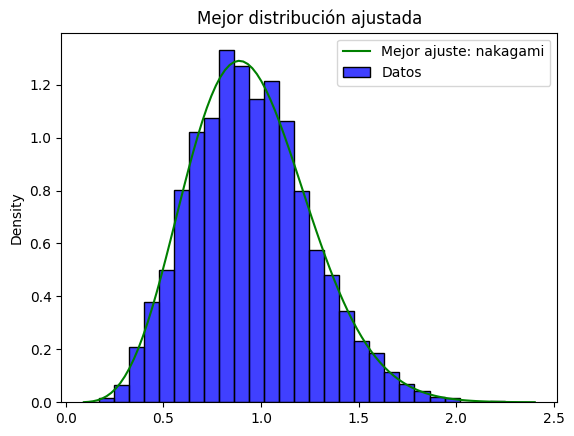

In [65]:
print("\n=== Mejor distribución ajustada según KS ===")
print(f"{best_fit}: KS-statistic = {ks_results[best_fit][0]:.4f}, p-value = {ks_results[best_fit][1]:.4f}")

# ====================================
# 5. Subplots 3x3 de cada distribución ajustada
# ====================================
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Crear figura de 3x3
axes = axes.flatten()  # Aplanar ejes para fácil acceso

# Rango para PDF
x = np.linspace(min(data_uploaded), max(data_uploaded), 100)

# Graficar histograma base en cada subplot
for idx, dist_name in enumerate(distributions):
    ax = axes[idx]
    ax.hist(data_uploaded, bins=30, density=True, alpha=0.5, color='blue', label="Datos")

    # Graficar PDF de la distribución ajustada
    params = f.fitted_param[dist_name]
    dist = scipy_distributions[dist_name]
    y = dist.pdf(x, *params)
    ax.plot(x, y, label=f'{dist_name}', color='red')

    # Mostrar título y leyenda
    ax.set_title(f"{dist_name}\nKS-Stat: {ks_results[dist_name][0]:.4f} | p-value: {ks_results[dist_name][1]:.4f}")
    ax.legend()

# Eliminar subplots vacíos si hay menos de 9 distribuciones
for i in range(len(distributions), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ====================================
# 6. Visualización final del mejor ajuste
# ====================================
print("\n=== Resumen gráfico del mejor ajuste ===")
best_params = f.fitted_param[best_fit]
best_dist = scipy_distributions[best_fit]

# Histograma y PDF del mejor ajuste
sns.histplot(data_uploaded, kde=False, stat="density", bins=30, label="Datos", color="blue")
plt.plot(x, best_dist.pdf(x, *best_params), label=f"Mejor ajuste: {best_fit}", color="green")
plt.legend()
plt.title("Mejor distribución ajustada")
plt.show()



### Descripcion de Las Distribuciones Agregadas  

Las siguientes distribuciones fueron analizadas para identificar cuál se ajusta mejor al conjunto de datos:  

- **Normal (norm):** Distribución simétrica en forma de campana, utilizada para modelar fenómenos naturales y sociales que tienden a agruparse alrededor de un valor promedio.  

- **Uniforme (uniform):** Distribución donde todos los valores dentro de un intervalo específico tienen la misma probabilidad de ocurrir, ideal para modelar incertidumbre completa.  

- **Beta (beta):** Distribución continua definida en el intervalo [0, 1], muy flexible para modelar proporciones, probabilidades o tasas.  

- **Gamma (gamma):** Distribución asimétrica y no negativa, utilizada para modelar tiempos de espera o la duración entre eventos. 

- **Log-normal (lognorm):** Distribución donde el logaritmo de la variable sigue una distribución normal, adecuada para modelar datos positivos y sesgados, como ingresos o tiempos de respuesta.  

- **Exponencial (expon):** Distribución que modela el tiempo entre eventos que ocurren de manera aleatoria a una tasa constante, común en procesos de llegada o fallos de sistemas.  

- **Nakagami (nakagami):** Distribución usada principalmente en el análisis de señales y telecomunicaciones para modelar fenómenos de dispersión y propagación de ondas.  

- **Weibull mínima (weibull_min):** Distribución flexible para modelar tiempos de vida o fallos, especialmente útil en análisis de supervivencia y confiabilidad. 
 
- **Triangular (triang):** Distribución definida por un valor mínimo, máximo y un valor de moda (pico), utilizada cuando se conoce poca información y se necesita una aproximación sencilla de una variable aleatoria.  


In [19]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
